Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/datavf.csv')
x=data.iloc[:, :-2]
y = data.account_type.values.tolist()

In [3]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit the scaler to your data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train the Suppport Vector Machines model

Calculate the accuracy of the model


Training Accuracy score: 0.8430681818181818
Testing Accuracy score: 0.8327272727272728
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2156
           1       0.83      0.85      0.84      2244

    accuracy                           0.83      4400
   macro avg       0.83      0.83      0.83      4400
weighted avg       0.83      0.83      0.83      4400



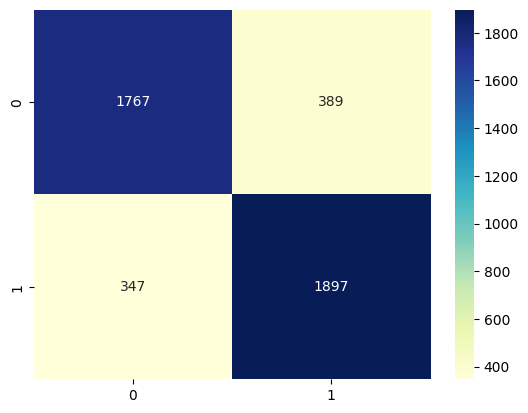

In [6]:
svc =  SVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


result

with StandardScaler et dimensionality reduction techniques.

Accuracy: 86.49%

Training Accuracy score: 0.8670979237682057
Testing Accuracy score: 0.8648899907034397
DecisionTreeClassifier score: 0.8670979237682057
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      2309
           1       0.87      0.93      0.90      4145

    accuracy                           0.86      6454
   macro avg       0.86      0.84      0.85      6454
weighted avg       0.86      0.86      0.86      6454



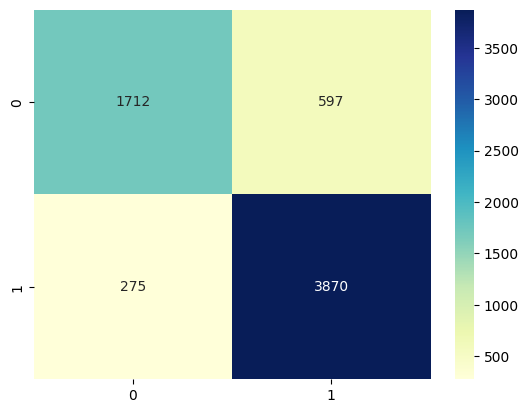

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', SVC() )
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# hyperparametre

In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating lists of parameter for SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(estimator = SVC(), param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

#  cross validation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE

df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf=SVC()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())